## Two neuron example

In [1]:
import numpy as np
import matplotlib.pyplot as plt

p = int(2) #features
n = int(10000) #examples

## generate some features for training data
X = np.random.rand(n,p)-0.5

## generate labels of the feature vectors with known functions
## Note that sign()/2+0.5 maps output to be 0 or 1, 
## which is the range of the activation fuction
Y1 = np.sign(-2*X[:,[0]]+.2-X[:,[1]])/2+.5
Y2 = np.sign(5*X[:,[0]]**3-X[:,[1]])/2+.5
Y = np.hstack((Y1, Y2))


# 1a )

The first case cannot form a non-linear boundary due to it having just one weight term. Since it is a linear equation, it can be accurately represented using just one neuron. The bias term shifts from the origin the boundary line. This bias is given by the 0.2 constant term.

# 1b )

The second case should form a non linear decision boundary by virtue of it being a cubic equation. But a single neuron cannot accurately capture this. Hidden layer gives flexibility to create non linear decision boundary. There is no bias term (unlike in the first case), so it has no impact on the classifier. Cubic equations for the most part do not have to pass through the origin, thus the bias plays no effect on the shape.

# 1c)

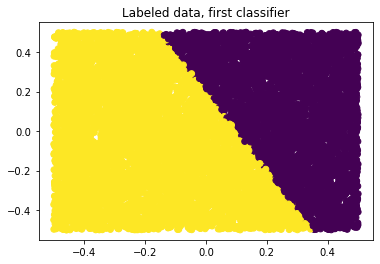

In [2]:
# Plot training data for first classification problem
plt.scatter(X[:,0], X[:,1], c=Y1.flatten())
plt.title('Labeled data, first classifier')
plt.show()

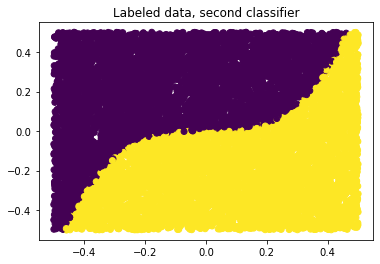

In [3]:
# Plot training data for second classification problem 
plt.scatter(X[:,0], X[:,1], c=Y2.flatten())
plt.title('Labeled data, second classifier')
plt.show()

In [4]:
## Train NN
Xb = np.hstack((np.ones((n,1)), X))
q = np.shape(Y)[1] #number of classification problems
M = 3 #number of hidden nodes

## initial weights
W = np.random.randn(p+1, q);

alpha = 0.1 #step size
L = 1 #number of epochs

def logsig(_x):
    return 1/(1+np.exp(-_x))
        
for epoch in range(L):
    ind = np.random.permutation(n)
    for i in ind:
        # Forward-propagate 
        Yhat = logsig(Xb[[i],:]@W) 
         # Backpropagate
        delta = (Yhat-Y[[i],:])*Yhat*(1-Yhat)
        Wnew = W - alpha*Xb[[i],:].T@delta
        W = Wnew
    print('epoch: ', epoch)

epoch:  0


In [5]:
## Final predicted labels (on training data)
H = logsig(np.hstack((np.ones((n,1)), Xb@W)))
Yhat = logsig(Xb@W)

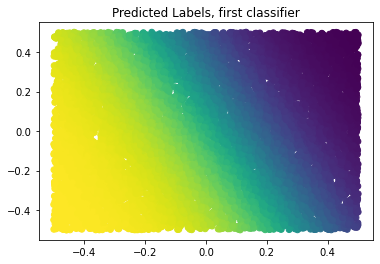

In [6]:
plt.scatter(X[:,0], X[:,1], c=Yhat[:,0])
plt.title('Predicted Labels, first classifier')
plt.show()

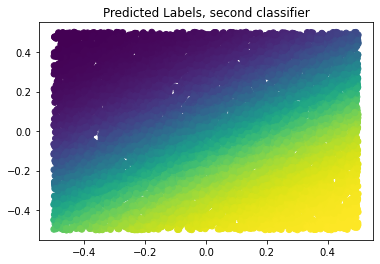

In [7]:
plt.scatter(X[:,0], X[:,1], c=Yhat[:,1])
plt.title('Predicted Labels, second classifier')
plt.show()

In [8]:
err_c1 = np.sum(abs(np.round(Yhat[:,0])-Y[:,0]))
print('Errors, first classifier:', err_c1)

err_c2 = np.sum(abs(np.round(Yhat[:,1])-Y[:,1]))
print('Errors, second classifier:', err_c2)

Errors, first classifier: 199.0
Errors, second classifier: 711.0


# 1d)

In [9]:
p = int(2) #features
n = int(10000) #examples

## generate some features for training data
X = np.random.rand(n,p)-0.5

## generate labels of the feature vectors with known functions
## Note that sign()/2+0.5 maps output to be 0 or 1, 
## which is the range of the activation fuction
Y1 = np.sign(-2*X[:,[0]]+.2-X[:,[1]])/2+.5
Y2 = np.sign(5*X[:,[0]]**3-X[:,[1]])/2+.5
Y = np.hstack((Y1, Y2))


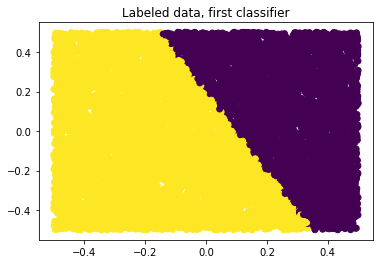

In [10]:
# Plot training data for first classification problem
plt.scatter(X[:,0], X[:,1], c=Y1.flatten())
plt.title('Labeled data, first classifier')
plt.show()

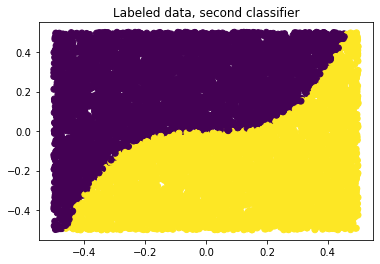

In [11]:
# Plot training data for second classification problem 
plt.scatter(X[:,0], X[:,1], c=Y2.flatten())
plt.title('Labeled data, second classifier')
plt.show()

In [12]:
## Train NN
Xb = np.hstack((np.ones((n,1)), X))
q = np.shape(Y)[1] #number of classification problems
M = 3 #number of hidden nodes

## initial weights
W = np.random.randn(p+1, q);

alpha = 0.1 #step size
L = 20 #number of epochs

def logsig(_x):
    return 1/(1+np.exp(-_x))
        
for epoch in range(L):
    ind = np.random.permutation(n)
    for i in ind:
        # Forward-propagate 
        Yhat = logsig(Xb[[i],:]@W) 
         # Backpropagate
        delta = (Yhat-Y[[i],:])*Yhat*(1-Yhat)
        Wnew = W - alpha*Xb[[i],:].T@delta
        W = Wnew
    print('epoch: ', epoch)

epoch:  0
epoch:  1
epoch:  2
epoch:  3
epoch:  4
epoch:  5
epoch:  6
epoch:  7
epoch:  8
epoch:  9
epoch:  10
epoch:  11
epoch:  12
epoch:  13
epoch:  14
epoch:  15
epoch:  16
epoch:  17
epoch:  18
epoch:  19


In [13]:
## Final predicted labels (on training data)
H = logsig(np.hstack((np.ones((n,1)), Xb@W)))
Yhat = logsig(Xb@W)

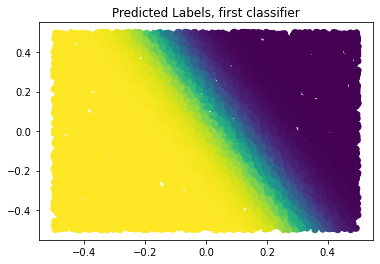

In [14]:
plt.scatter(X[:,0], X[:,1], c=Yhat[:,0])
plt.title('Predicted Labels, first classifier')
plt.show()

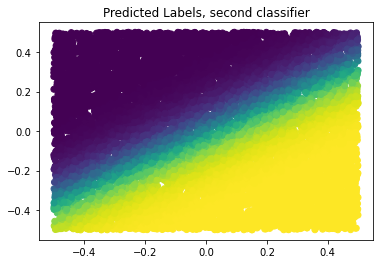

In [15]:
plt.scatter(X[:,0], X[:,1], c=Yhat[:,1])
plt.title('Predicted Labels, second classifier')
plt.show()

In [16]:
err_c1 = np.sum(abs(np.round(Yhat[:,0])-Y[:,0]))
print('Errors, first classifier:', err_c1)

err_c2 = np.sum(abs(np.round(Yhat[:,1])-Y[:,1]))
print('Errors, second classifier:', err_c2)

Errors, first classifier: 36.0
Errors, second classifier: 761.0


# 1e)

We see an Improvement for case 1, as the relation is linear, thus it is super close to accurate parameter for the linear function. Format is of linear combination in the nerual network setup. For the Cubic function in case 2, no matter how many iterations we run, there is an upper bound for performance. Does not improve a lot with more epochs being added. This is because a single neuron cannot capture the complexity of a cubic equation.